# Life Expectancy Analysis 

### Importing Libraries

In [1]:
%matplotlib inline    
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Extracting Data

In [2]:
life_data = pd.read_csv("LED.csv")
life_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
life_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
#Remove Leading spaces : use lstrip() method
life_data.columns =  [names.lstrip() for names in life_data.columns]

#Remove Trailing spaces : use lstrip() method
life_data.columns =  [names.rstrip() for names in life_data.columns]

#Capliatize column name, making them consistent
life_data.columns = [names.capitalize() for names in life_data.columns]

In [5]:
life_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis b',
       'Measles', 'Bmi', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'Hiv/aids', 'Gdp', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis b                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  Bmi                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
life_data.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

In [8]:
life_data.describe()

,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis b,Measles,Bmi,Under-five deaths,Polio,Total expenditure,Diphtheria,Hiv/aids,Gdp,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


The standard deviation of the features Infant deaths, Percentage Expenditure , Measles, Under five deaths,GDP,Population is a lot higher than the mean(more than twice).

This implies that the data is not centered around its mean and are more spread out. Or we can say there is large variation in the data ranging from min-max.

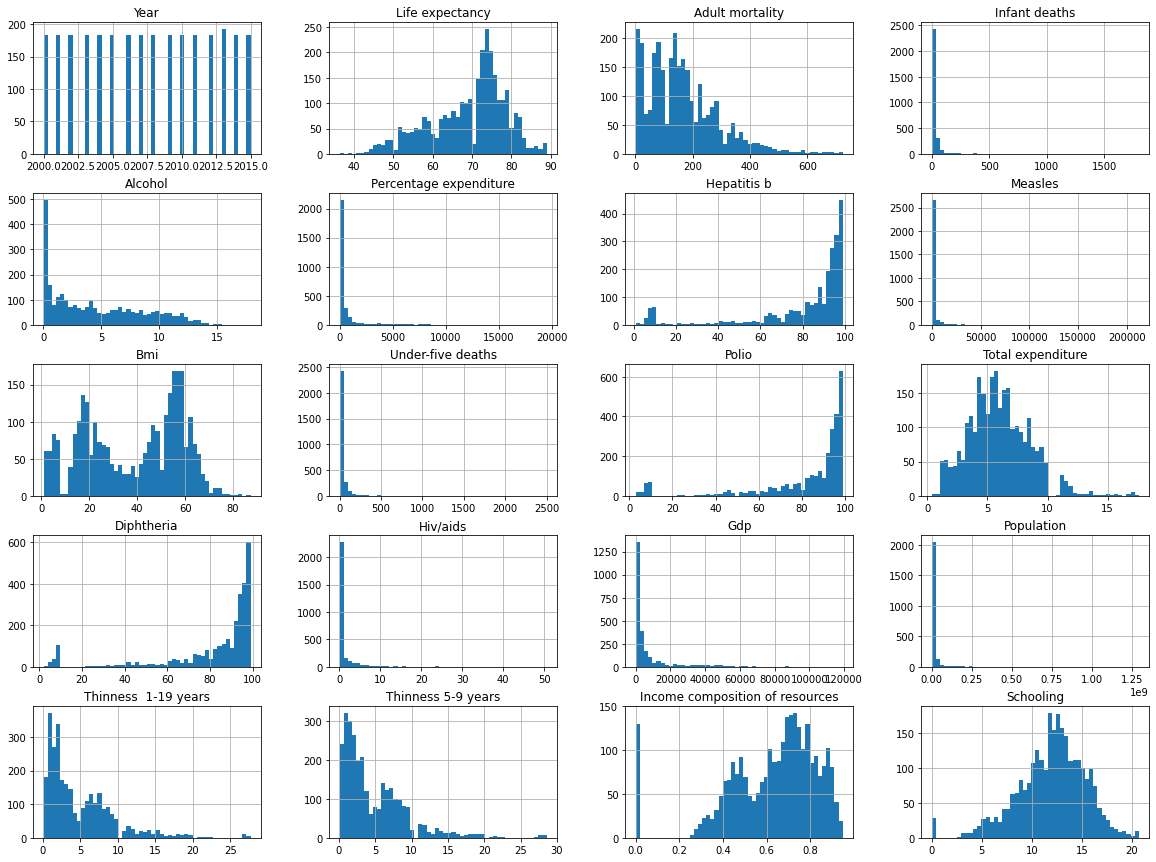

In [9]:
life_data.hist(bins = 50,figsize = (20,15))
plt.show()

In [10]:
life_data["Country"].value_counts()

Indonesia                16
Sao Tome and Principe    16
Tajikistan               16
Luxembourg               16
Fiji                     16
                         ..
Palau                     1
San Marino                1
Dominica                  1
Cook Islands              1
Tuvalu                    1
Name: Country, Length: 193, dtype: int64

In [11]:
life_data["Status"].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

## EDA:DATA CLEANING

### Checking for Outlier:

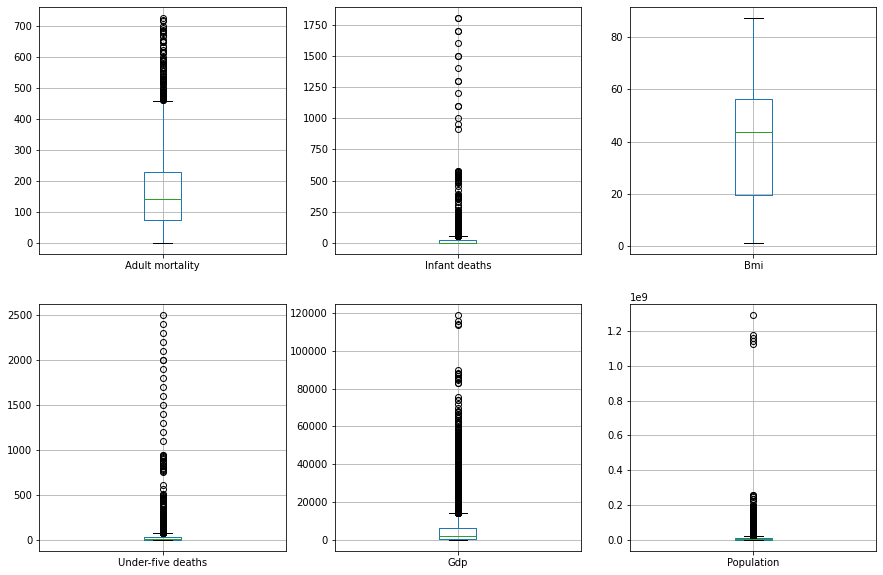

In [12]:
life_copy = life_data.copy()
plt.figure(figsize=(15,10))

for i,column in enumerate(['Adult mortality', 'Infant deaths', 'Bmi', 'Under-five deaths', 'Gdp', 'Population'],start=1):
    plt.subplot(2, 3,i)
    life_copy.boxplot(column)

In [13]:
#Adult mortality rates lower than the 5th percentile
mortality_less_5_per = np.percentile(life_copy["Adult mortality"].dropna(),5) 
life_copy["Adult mortality"] = life_copy.apply(lambda x: np.nan if x["Adult mortality"] < mortality_less_5_per else x["Adult mortality"], axis=1)

In [14]:
#Remove Infant deaths of 0
life_copy["Infant deaths"] = life_copy["Infant deaths"].replace(0,np.nan)
#Remove the invalid BMI
life_copy["Bmi"] =life_copy.apply(lambda x : np.nan if (x["Bmi"] <10 or x["Bmi"] >50) else x["Bmi"],axis =1)
#Remove Under five deaths
life_copy["Under-five deaths"] =life_copy["Under-five deaths"].replace(0,np.nan)

### Handling Missing Values:

In [15]:
life_copy.isnull().sum()

Country                               0
Year                                  0
Status                                0
Life expectancy                      10
Adult mortality                     155
Infant deaths                       848
Alcohol                             194
Percentage expenditure                0
Hepatitis b                         553
Measles                               0
Bmi                                1456
Under-five deaths                   785
Polio                                19
Total expenditure                   226
Diphtheria                           19
Hiv/aids                              0
Gdp                                 448
Population                          652
Thinness  1-19 years                 34
Thinness 5-9 years                   34
Income composition of resources     167
Schooling                           163
dtype: int64

In [16]:
life_copy.drop(columns='Bmi', inplace=True)

In [17]:
imputed_data = []

for year in list(life_copy.Year.unique()):
    year_data = life_copy[life_copy.Year == year].copy()
    
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()

    imputed_data.append(year_data)
df = pd.concat(imputed_data).copy()

In [18]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis b                        0
Measles                            0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
Hiv/aids                           0
Gdp                                0
Population                         0
Thinness  1-19 years               0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

### Outliers Detection:

In [19]:
life_numeric_data = df.drop(columns=["Year","Country","Status"])

In [20]:
%matplotlib inline

def plot_numeric_data(data):
    i = 0
    for col in data.columns:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
        
    plt.show()

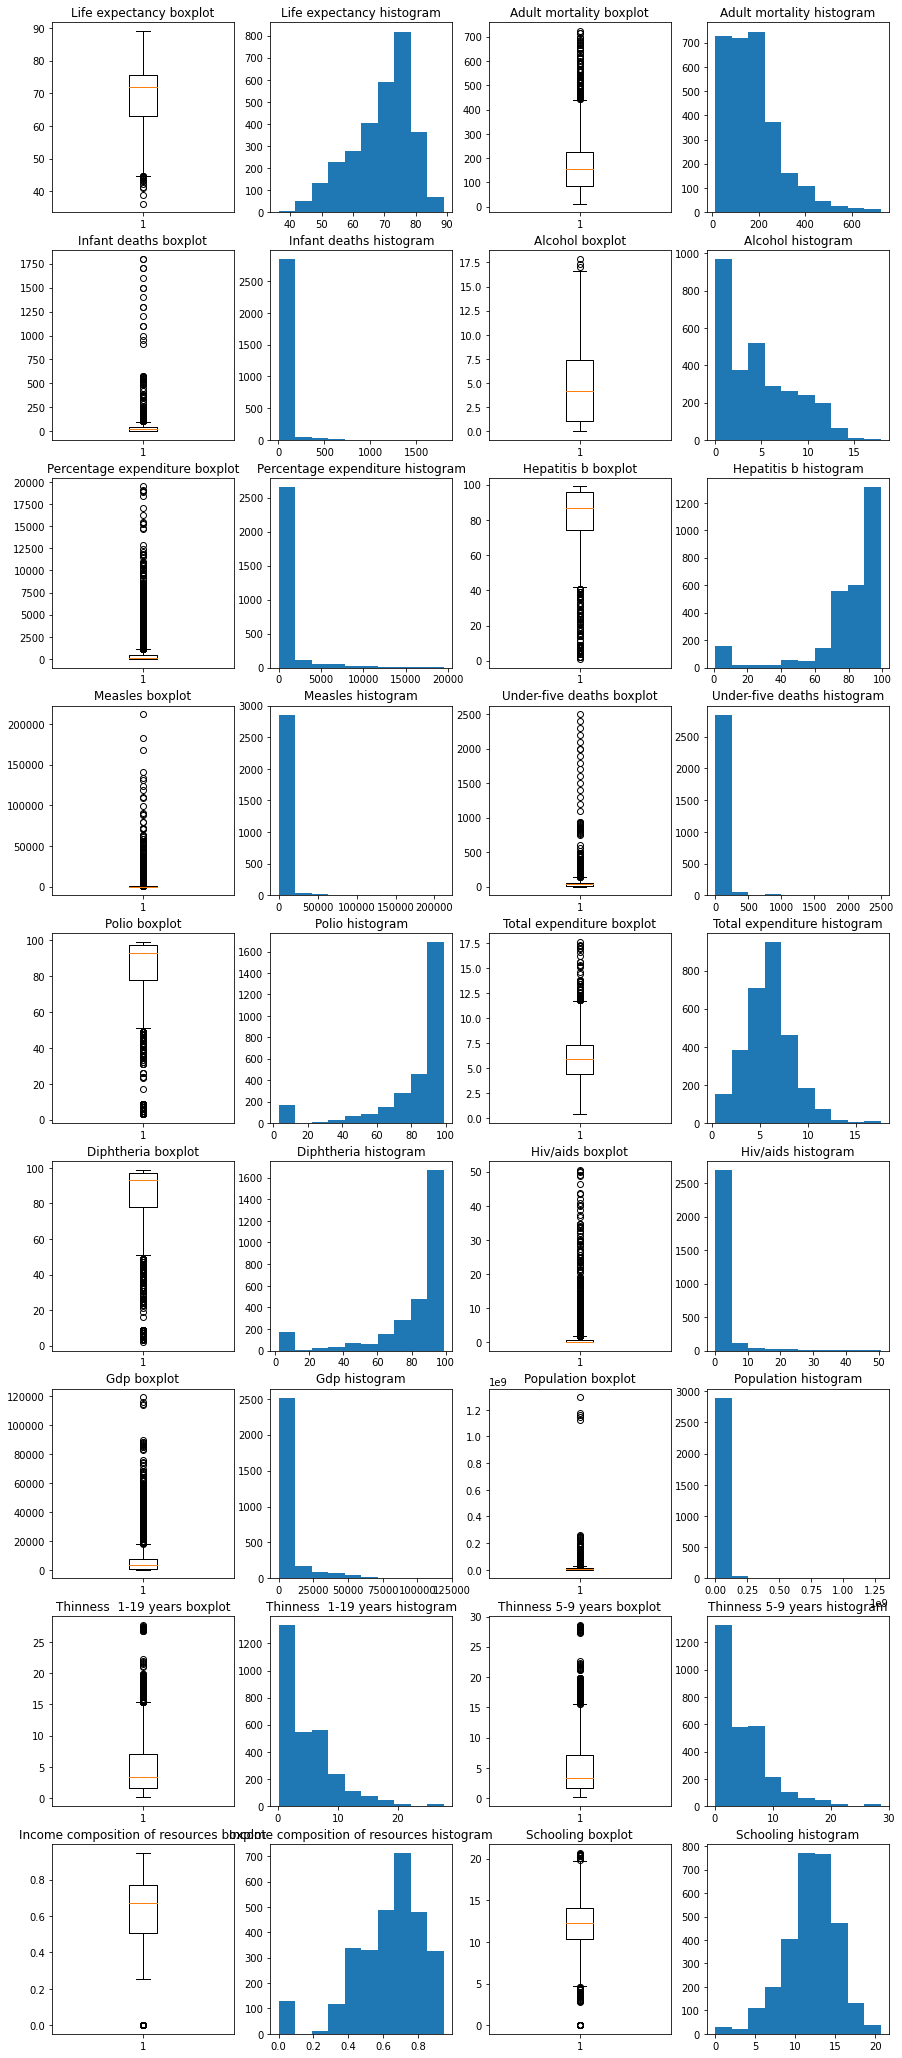

In [21]:
plt.figure(figsize=(15,37))
plot_numeric_data(life_numeric_data)

In [22]:
def outlier_count(col, data=df):
    
    print("\n"+15*'-' + col + 15*'-'+"\n")
    
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [23]:
cont_vars = list(life_numeric_data)
for col in cont_vars:
    outlier_count(col)


---------------Life expectancy---------------

Number of outliers: 17
Percent of data that is outlier: 0.58%

---------------Adult mortality---------------

Number of outliers: 97
Percent of data that is outlier: 3.3%

---------------Infant deaths---------------

Number of outliers: 135
Percent of data that is outlier: 4.59%

---------------Alcohol---------------

Number of outliers: 3
Percent of data that is outlier: 0.1%

---------------Percentage expenditure---------------

Number of outliers: 389
Percent of data that is outlier: 13.24%

---------------Hepatitis b---------------

Number of outliers: 222
Percent of data that is outlier: 7.56%

---------------Measles---------------

Number of outliers: 542
Percent of data that is outlier: 18.45%

---------------Under-five deaths---------------

Number of outliers: 142
Percent of data that is outlier: 4.83%

---------------Polio---------------

Number of outliers: 279
Percent of data that is outlier: 9.5%

---------------Total expendi

In [24]:
from scipy.stats.mstats import winsorize

def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

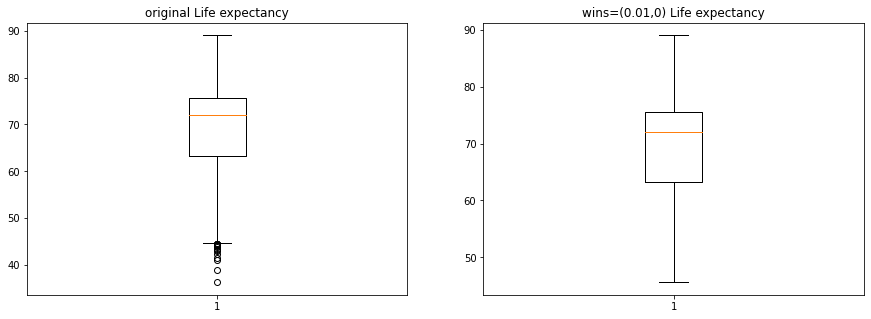

In [27]:
wins_dict = {}
test_wins(cont_vars[0], lower_limit=.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=.04, show_plot=False)
test_wins(cont_vars[2], upper_limit=.05, show_plot=False)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=False)
test_wins(cont_vars[4], upper_limit=.135, show_plot=False)
test_wins(cont_vars[5], lower_limit=.1, show_plot=False)
test_wins(cont_vars[6], upper_limit=.19, show_plot=False)
test_wins(cont_vars[7], upper_limit=.05, show_plot=False)
test_wins(cont_vars[8], lower_limit=.1, show_plot=False)
test_wins(cont_vars[9], upper_limit=.02, show_plot=False)
test_wins(cont_vars[10], lower_limit=.105, show_plot=False)
test_wins(cont_vars[11], upper_limit=.185, show_plot=False)
test_wins(cont_vars[12], upper_limit=.105, show_plot=False)
test_wins(cont_vars[13], upper_limit=.07, show_plot=False)
test_wins(cont_vars[14], upper_limit=.035, show_plot=False)
test_wins(cont_vars[15], upper_limit=.035, show_plot=False)
test_wins(cont_vars[16], lower_limit=.05, show_plot=False)
test_wins(cont_vars[17], lower_limit=.025, upper_limit=.005, show_plot=False)

In [28]:
#A new dataframe with the winsorized data 
wins_df = df.iloc[:, 0:3]
for col in cont_vars:
    wins_df[col] = wins_dict[col]

In [29]:
dataset = wins_df.drop(columns= ["Year","Country"],axis = True)
#Dealing with Categorical data
status = pd.get_dummies(dataset.Status)
dataset = pd.concat([dataset, status], axis = 1)
dataset= dataset.drop(['Status'], axis=1)

Lets Split the data into training and test data

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dataset.drop(columns = ["Life expectancy"],axis = 1),
                                                 dataset["Life expectancy"],
                                                 test_size = 0.2,
                                                 random_state = 42)

#### Feature Scaling 

In [32]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)

### Train the model using Linear Regression 

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled,y_train)

#Make predictions
y_pred = linear_regressor.predict(X_train_scaled)
#Calculating RMSE
linear_r2_score = r2_score(y_train,y_pred)

print('Linear Regression Accuracy : ',linear_r2_score)

Linear Regression Accuracy :  0.8516385255593645


### Train the model using Decision Tree Classifier

In [35]:
#import necessary modules
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train_scaled,y_train)
#Make predictions
y_pred = tree_reg.predict(X_train_scaled)

#Calculating RMSE
tree_r2_score = r2_score(y_train,y_pred)

print('Decision Tree Accuracy : ',tree_r2_score)

1.0


### Train the model using Random Forest Classifier

In [40]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
socre = make_scorer("r2_score")

forest_reg = RandomForestRegressor()

forest_reg.fit(X_train_scaled,y_train)
#Make predictions
y_pred = forest_reg.predict(X_train_scaled)
#Calculating RMSE
forest_r2_score = r2_score(y_train,y_pred)

print('Random Forest Regressor Accuracy : ',forest_r2_score)

Random Forest Regressor Accuracy :  0.9935471256969499


### Evaluate Your System on the Test Set

In [41]:
X_test_scaled = std_scaler.fit_transform(X_test)
y_pred = forest_reg.predict(X_test_scaled)

#Calculating RMSE
tree_r2_score = r2_score(y_test,y_pred)

print("R^2 score: %.2f"%tree_r2_score)

R^2 score: 0.95
